<a href="https://colab.research.google.com/github/theanshsrivastav/Customer-Segmentation-using-K-Means-Clustering-/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

Data Collection & Analysis


In [2]:
 # loading the data from csv file to a Pandas DataFrame
 customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
# first five rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Exploratory data analysis (EDA)

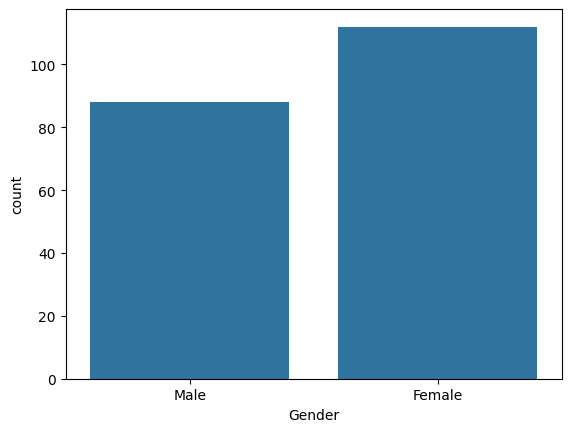

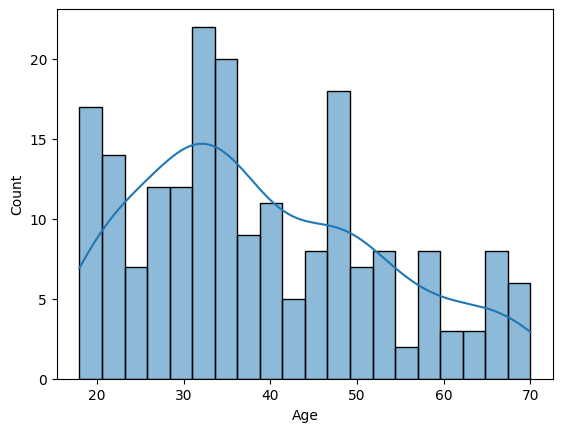

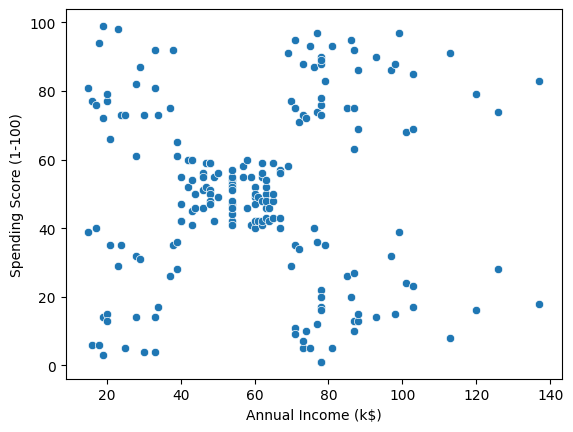

In [7]:
# Gender distribution
sns.countplot(x="Gender", data=customer_data)
plt.show()

# Age distribution
sns.histplot(customer_data["Age"], bins=20, kde=True)
plt.show()

# Income vs Spending Score
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=customer_data)
plt.show()


Choosing the features Age, Annual income & Spending Score


In [8]:
features = customer_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
x = scaler.fit_transform(features)

scaled_customer_data = pd.DataFrame(x, columns=features.columns)
scaled_customer_data.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Choosing the number of clusters


WCSS -> Within Clusters Sum of Squares

In [ ]:
# finding wcss value for different number of clusters

wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

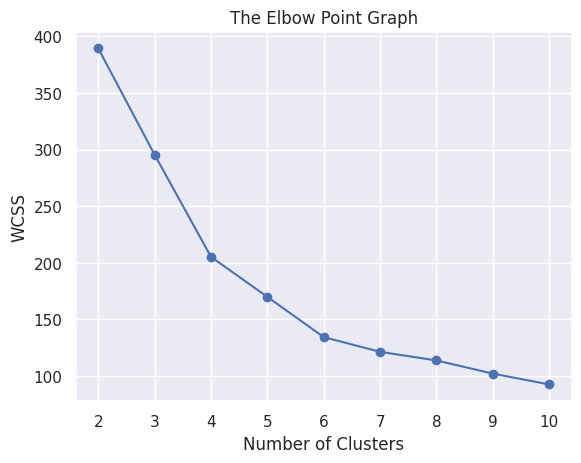

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(2,11), wcss, marker='o')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

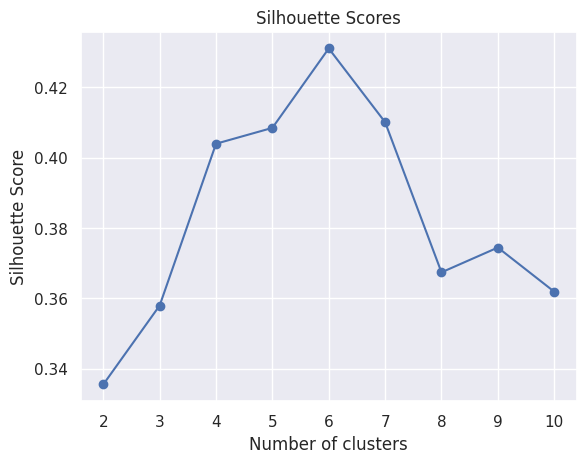

In [ ]:
# Silhouette Score
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

Optimum Number of Clusters = 6


Training the k-Means Clustering Model

In [9]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(x)

# Cluster Centroids (in scaled space)
centroids = kmeans.cluster_centers_
print("Cluster Centroids (scaled):\n", centroids)

# Convert back to original scale
centroids_original = scaler.inverse_transform(centroids)
print("Cluster Centroids (original features):\n", centroids_original)

Cluster Centroids (scaled):
 [[ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [-0.95377931 -1.30081415  1.01091344]
 [-0.91323113 -0.0433223  -0.22322397]
 [ 0.36959845  1.12879725 -1.25264236]
 [ 0.47895722 -1.30822992 -1.19644353]]
Cluster Centroids (original features):
 [[56.33333333 54.26666667 49.06666667]
 [32.69230769 86.53846154 82.12820513]
 [25.56       26.48       76.24      ]
 [26.125      59.425      44.45      ]
 [44.         90.13333333 17.93333333]
 [45.52380952 26.28571429 19.38095238]]


6 Clusters -0,1,2,3,4,5

Visualizing  all the Clusters


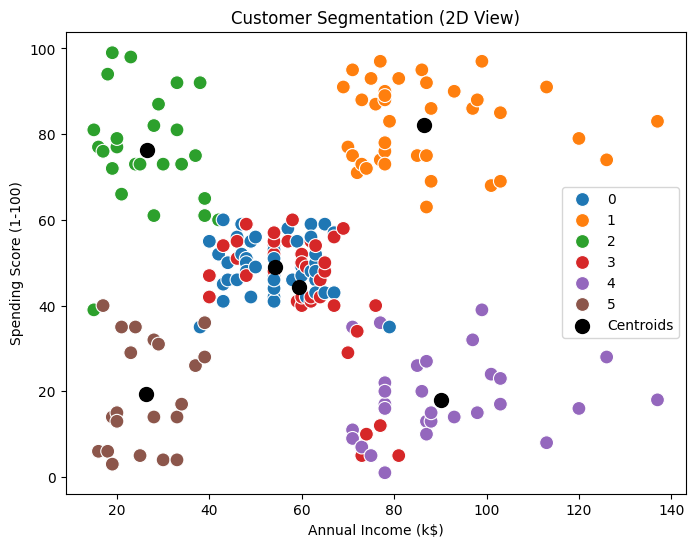

In [18]:
# 2D Visualization (Annual Income vs Spending Score)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="tab10",
    data=customer_data,
    s=100,
)

# Plot centroids
plt.scatter(
    centroids_original[:,1], centroids_original[:,2],
    s=100, c="black", marker="o", label="Centroids"
)
plt.title("Customer Segmentation (2D View)")
plt.legend()
plt.show()

3D Visualization


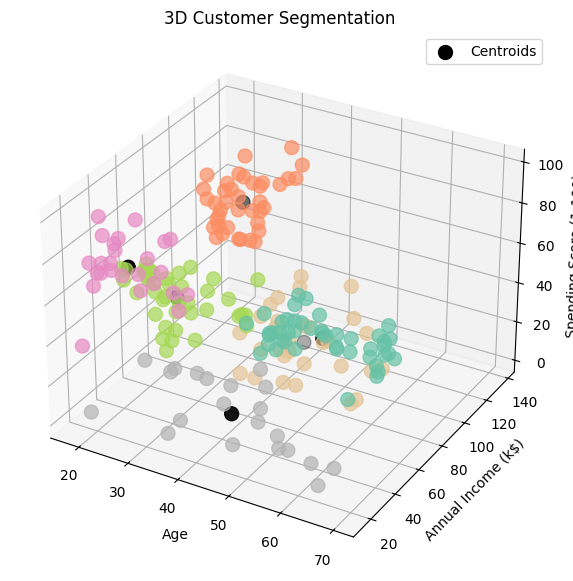

In [33]:
# 3D Visualization (Age, Income, Spending Score)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    customer_data["Age"], customer_data["Annual Income (k$)"], customer_data["Spending Score (1-100)"],
    c=customer_data["Cluster"], cmap="Set2", s=100, alpha=0.7
)

# Plot centroids
ax.scatter(
    centroids_original[:,0], centroids_original[:,1], centroids_original[:,2],
    s=100, c="black", marker="o", label="Centroids"
)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Customer Segmentation")
plt.legend()
plt.show()

In [27]:
cluster_profile = customer_data.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_profile)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        56.333333           54.266667               49.066667
1        32.692308           86.538462               82.128205
2        25.560000           26.480000               76.240000
3        26.125000           59.425000               44.450000
4        44.000000           90.133333               17.933333
5        45.523810           26.285714               19.380952
